# Research Questions

How valuable was Derek Jeter to the NY Yankees?

How much did Derek Jeter contribute to the wins based on the variables we chose to include?

Looking at other players, was Derek Jeter significantly better at getting a win?

Did Derek Jeter improve throughout his seasons on the Yankees? Did he peak? Which season was his best? What are his most important contributing factors?

# Data Description


Year - the season the data is from.

RSLT - Result: Win or Loss, tracks whether the baseball game played was a win or a loss for the team

H - hits, tracks how many hits Derek Jeter had in a given game. A hit, also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice

HR - home runs, tracks how many home runs Derek Jeter had in a given game. A home run is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process

SB - stolen base, tracks how many bases Derek Jeter had in a given game. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

BB - base on balls (walk) tracks how many walks Derek Jeter had in a given game. A base on balls, also known as a walk, occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out

WPA - win probability added, tracks Derek Jeter’s win probability added in a given game. Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game.

What are the observations (rows) and the attributes (columns)?
-- Each row represents a single game for the 20 seasons he played baseball. The columns each represent a different record of data, or a calculated statistic as explained above.

Why was this dataset created?
-- This data set was created for the purpose of tracking New York Yankees player, Derek Jeter. He was an outstanding player and these statistics were compiled together after each game, each season to allow MLB fans to look back on the result and statistics of the game, and to look at the individual players success.

What processes might have influenced what data was observed and recorded and what was not?
-- Any data that is considered a significant play is recorded. Whenever a player gets a hit, a homerun, times up to bat, etc. The dataset that we are utilizing is a batting log, so only plays that happen while up to bat or on base are recorded.

What preprocessing was done, and how did the data come to be in the form that you are using?
-- The only preprocessed variable in our usage of the dataset is the WPA, win probability added. This is calculated using the data collected throughout the game. We included this in our dataset to compare how much the variables we choose contributed to the actual win probability added.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
-- Yes, collecting sports statistics happens at every major league sporting event and even lower levels. The statistics and data are used for many different purposes. The data that is collected and analyzed is used to help increase fan experience and attendance from year to year. Sports analytics are crucial to many teams by helping them become their best through interpretation and analysis of statistics gained in games.

Who funded the creation of the dataset?
-- 

# Data Collection and Cleaning

To collect our data, we scraped online databases of baseball statistics in order to pull all of Derek Jeter’s in game statistics on a game by game basis for every game of his career ranging from 1995 to 2014. This data contained all of his batting statistics including variables such as OPS, BA, CS, GDP, SH, SF, HBP, SO, IBB, RE24, cWPA, and other such acronyms relating to baseball measurements. However, not all of these variables are applicable or comparable in regards to the type of inferences we are trying to make. Thus, in our data cleaning process, we first evaluated which of the variables would be appropriate and comparable for our studies. We came up with a final list of variables including year, home runs, hits, game result, stolen bases, base on balls, and win probability added. These variables are unique in that they are recorded on a game by game basis and do not accumulate, unlike some of the other variables that were included in the stat sheet. Then, with these specific statistics chosen, we cleaned the data by simply excluding the statistics that we did not want, and then combining the statistics that we did want into a single dataframe which is easily processable and neat. Through this process, we cut our dataset from 38 columns over 19 dataframes to a more readable six columns all in one dataframe. 


# Data Limitations

Baseball statistics are inherently limited in the scope of what they measure. Thus, our dataset can only provide limited conclusions as well. This dataset could include many other statistics if it were to be complete and provide the best, most accurate conclusions, but due to the difficulty of processing so many variables and the time constraints of this project, we chose only the most important ones. There is the possibility that there is human error in recording the information, and it is possible that the older statistics from 1995 are not as precise as the ones gathered more recently, given new technology in sports statistic reporting and recording. 


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


In [29]:
jeter = pd.read_csv("JeterStats.csv")
jeter['win'] = jeter.Rslt.apply(lambda x: 1 if 'W' in x else 0)
jeter_win_subset = jeter[jeter['win']==1]
jeter_loss_subset = jeter[jeter['win']==0]
jeter.head()

,Year,Rslt,H,HR,SB,BB,WPA,win
0,2014,"L,2-6",1,0,0,0,0.026,0
1,2014,"L,1-3",0,0,0,1,-0.051,0
2,2014,"W,4-2",1,0,0,1,0.089,1
3,2014,"L,0-4",0,0,0,2,0.180,0
4,2014,"W,6-4",2,0,0,0,0.007,1


The above code adds a 'win' column to the Jeter dataframe, with the value 1 representing a win, and a 0 representing a loss

In [30]:
walks = np.array(jeter.loc[:,"BB"])
wins = np.array(jeter.loc[:,"win"])
correlation_bb_wins = np.corrcoef(walks,wins)
print("Correlation between walks and wins: ", round(correlation_bb_wins[0][1],4))

Correlation between walks and wins:  0.0581


There is a slight positive correlation between the number of walks Derek Jeter had and the number of wins the Yankees had. This makes sense, as getting to first base is a first step towards scoring, and ultimately towards winning a game.

In [31]:
sb = np.array(jeter.loc[:,"SB"])
wins = np.array(jeter.loc[:,"win"])
correlation_sb_wins = np.corrcoef(sb,wins)
print('Correlation between stolen bases and wins: ', round(correlation_sb_wins[0][1],4))

Correlation between stolen bases and wins:  0.0628


There is a slight positive correlation between the number of stolen bases Derek Jeter had and the number of wins he had. Meaning if he stole a base, there is a slight positive probability that the Yankees won that game.

In [41]:
real_slope = 0.1658
real_x = np.array(jeter.loc[:,'SB'])
noise = np.random.normal(0,0.5, size=len(jeter.loc[:,"SB"]))
real_y = real_x * real_slope  +  noise
df = pd.DataFrame({"SB": real_x, "win": real_y})
model = LinearRegression().fit(df[["SB"]], df["win"])
print("Estimated Slope: ", model.coef_[0])

Estimated Slope:  0.21016625897063304


The observed slope is slightly greater than the real slope because of the added noise and unpredictability of said noise.

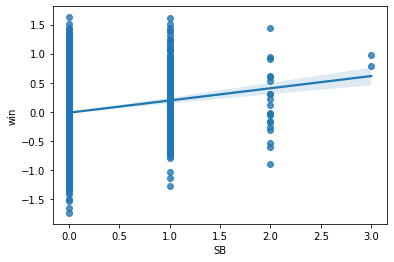

In [42]:
sns.regplot(x='SB', y='win', data=df);

In [35]:
contribute = jeter.WPA.mean()
print('Mean WPA: {:.6f}'.format(contribute))

Mean WPA: 0.011262


Looking at the mean WPA of 0.011262, this shows that overall Derek Jeter made a positive contribution over the 20 seasons he played.

([<matplotlib.axis.XTick at 0x1a1b1fad90>,
 <a list of 10 Text xticklabel objects>)

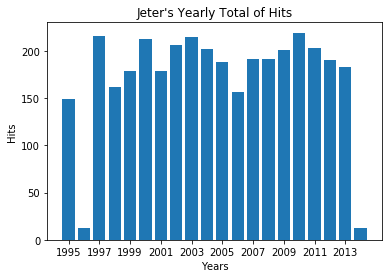

In [89]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['H'])
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title("Jeter's Yearly Total of Hits")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))

The above graph shows that Derek Jeter recorded the most hits in the seasons of 1997, 2000, 2003, and 2010.

([<matplotlib.axis.XTick at 0x1a1b1e2610>,
 <a list of 10 Text xticklabel objects>)

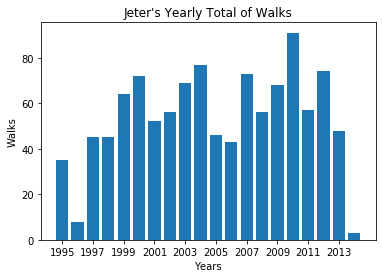

In [90]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['BB'])
plt.xlabel('Years')
plt.ylabel('Walks')
plt.title("Jeter's Yearly Total of Walks")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))

The above graph shows that Derek Jeter recorded his most walks in the season of 2010.

([<matplotlib.axis.XTick at 0x1a1b0ceed0>,
 <a list of 10 Text xticklabel objects>)

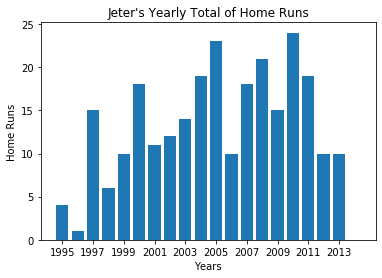

In [91]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['HR'])
plt.xlabel('Years')
plt.ylabel('Home Runs')
plt.title("Jeter's Yearly Total of Home Runs")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))

The above graph shows that Derek Jeter recorded his most Home Runs in the seasons of 2004 and 2010.

([<matplotlib.axis.XTick at 0x1a1b22c1d0>,
 <a list of 10 Text xticklabel objects>)

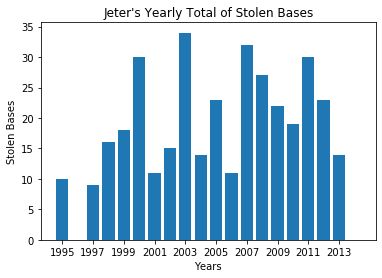

In [92]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['SB'])
plt.xlabel('Years')
plt.ylabel('Stolen Bases')
plt.title("Jeter's Yearly Total of Stolen Bases")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))

The above graph shows that Derek Jeter recorded the most Stolen Bases in the seasons of 2000, 2003, 2007, and 2011. 

([<matplotlib.axis.XTick at 0x1a1b5a5090>,
 <a list of 10 Text xticklabel objects>)

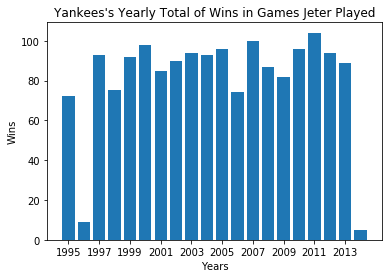

In [94]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['win'])
plt.xlabel('Years')
plt.ylabel('Wins')
plt.title("Yankees's Yearly Total of Wins in Games Jeter Played")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))

The above graph shows that the Yankees won the most games of games that Derek Jeter Played in the seasons of 1997, 2000, 2003, 2005, 2007, 2010, and 2011 

Seasons where Jeter's stats peaked as well as Yankee Wins: 1997, 2000, 2003, 2007, 2010, 2011

From the data analysis from above, Jeter had 6 above average seasons. To further look at Jeter's contributions and importance to the NY Yankees, will will be using his 2010 season to compare to other players in the same season. This will allow us to compare his batting statistics with other players to see if he contributed more to his team than others.

# Josh Hamilton

Joshua Holt Hamilton is an American former professional baseball outfielder. He played in Major League Baseball for the Cincinnati Reds, Texas Rangers, and Los Angeles Angels of Anaheim. Hamilton is a five-time MLB All-Star and won the American League Most Valuable Player Award in 2010.

In [34]:
hamilton = pd.read_csv('Hamilton.csv')
hamilton.head()

,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,336,1,5-Apr,TEX,TOR,"W,5-4",CG,4,3,...,0.250,0.000,0.250,3,1.69,-0.176,1.65,-0.10%,-0.62,LF
1,2,337,2,7-Apr,TEX,TOR,"L,4-7",CG,4,4,...,0.125,0.000,0.125,3,1.20,-0.124,1.26,-0.08%,-0.93,LF
2,3,338,3,8-Apr,TEX,TOR,"L,1-3",7-GF,2,1,...,0.200,0.000,0.200,8,1.12,-0.040,1.14,-0.03%,-0.25,PH LF
3,4,339,4,9-Apr,TEX,SEA,"W,6-2",CG,4,3,...,0.286,0.182,0.468,3,0.66,0.013,0.79,0.01%,1.15,LF
4,5,340,5,10-Apr,TEX,SEA,"L,3-4",CG,4,2,...,0.389,0.385,0.774,3,0.71,0.126,0.88,0.09%,1.29,LF


# Miguel Cabrera

José Miguel Cabrera Torres, commonly known as Miguel Cabrera and nicknamed "Miggy", is a Venezuelan professional baseball first baseman and designated hitter for the Detroit Tigers of Major League Baseball.

In [36]:
cabrera = pd.read_csv('Cabrera.csv')
cabrera.head()

,Rk,Gcar,Gtm,Date,Tm,Column1,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,1041,1,Apr 5,DET,@,KCR,"W,8-4",CG,5,...,.600,.500,1.100,4,1.09,0.211,1.17,0.14%,1.70,1B
1,2,1042,2,Apr 7,DET,@,KCR,"L,2-3",CG(11),5,...,.500,.778,1.278,4,1.54,0.364,1.71,0.24%,0.41,1B
2,3,1043,3,Apr 8,DET,@,KCR,"W,7-3",CG,5,...,.600,1.000,1.600,4,1.84,0.480,2.13,0.33%,3.23,1B
3,4,1044,4,Apr 9,DET,NaN,CLE,"W,5-2",CG,4,...,.526,.824,1.350,4,.61,-0.036,.73,-0.03%,-0.75,1B
4,5,1045,5,Apr 10,DET,NaN,CLE,"W,4-2",CG,4,...,.522,.750,1.272,4,.53,-0.013,.64,-0.01%,-0.77,1B


# Alberto Pujols

José Alberto Pujols Alcántara is a Dominican-American professional baseball first baseman and designated hitter for the Los Angeles Angels of Major League Baseball. He previously played 11 seasons for the St. Louis Cardinals, with whom he was a three-time National League Most Valuable Player and nine-time All-Star.

In [39]:
pujols = pd.read_csv('Pujols.csv')
pujols.head()

,Rk,Gcar,Gtm,Date,Tm,Column1,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,1400,1,Apr 5,STL,@,CIN,"W,11-6",CG,5,...,0.800,2.000,2.800,3,0.80,0.342,0.85,0.22%,4.47,1B
1,2,1401,2,Apr 7,STL,@,CIN,"W,6-3",CG,5,...,0.600,1.222,1.822,3,0.89,0.165,0.96,0.11%,1.06,1B
2,3,1402,3,Apr 8,STL,@,CIN,"L,1-2",CG,4,...,0.500,0.917,1.417,3,1.10,0.039,1.22,0.03%,0.33,1B
3,4,1403,4,Apr 9,STL,@,MIL,"W,5-4",CG,4,...,0.444,0.733,1.178,3,1.60,-0.099,1.85,-0.07%,-1.08,1B
4,5,1404,5,Apr 10,STL,@,MIL,"W,7-1",CG,4,...,0.409,0.632,1.041,3,0.34,0.040,0.42,0.03%,1.27,1B


# Data Cleaning and Description

This data set is from the same source as Jeter, just the stats of Josh Hamilton for the 2010 season. They are collected for the same reasons, for fan use and data analysis of the players.

In [37]:
hamilton = hamilton[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
print('Hamilton Table:')
hamilton.head()

Hamilton Table:


,Rslt,H,HR,SB,BB,WPA
0,"W,5-4",0,0,0,1,-0.176
1,"L,4-7",0,0,0,0,-0.124
2,"L,1-3",0,0,0,1,-0.040
3,"W,6-2",1,0,0,1,0.013
4,"L,3-4",1,0,0,2,0.126


In [38]:
cabrera = cabrera[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
print('Cabrera Table:')
cabrera.head()

Cabrera Table:


,Rslt,H,HR,SB,BB,WPA
0,"W,8-4",2,0,0,1,0.211
1,"L,2-3",2,1,0,0,0.364
2,"W,7-3",4,1,0,0,0.480
3,"W,5-2",0,0,0,1,-0.036
4,"W,4-2",1,0,0,1,-0.013


In [40]:
pujols = pujols[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
print('Pujols Table:')
pujols.head()

Pujols Table:


,Rslt,H,HR,SB,BB,WPA
0,"W,11-6",4,2,0,0,0.342
1,"W,6-3",1,0,0,1,0.165
2,"L,1-2",0,0,0,1,0.039
3,"W,5-4",0,0,0,1,-0.099
4,"W,7-1",1,0,0,0,0.040


Now after selecting the same variables as we used with Jeter, we can use these statistics to compare the contribution that Jeter made to Hamilton, Cabrera and Pujols.